In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df2 = df.drop("availability", axis=1)

In [10]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2["location"].nunique()

1305

In [12]:
df2["bath"].value_counts().head()

2.0    6908
3.0    3286
4.0    1226
1.0     788
5.0     524
Name: bath, dtype: int64

In [13]:
df2["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [14]:
df2 = df2.drop("society", axis=1)

In [15]:
df2.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [16]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [17]:
df2 = df2.drop("balcony", axis=1)

In [18]:
df3 = df2.dropna()

In [19]:
df3.shape

(13246, 6)

In [20]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))

<ipython-input-22-fd80ab780821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))


In [23]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [24]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [27]:
def sqrt_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) +float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df4 = df3.copy()

In [29]:
df4["total_sqft"] = df3["total_sqft"].apply(sqrt_to_num)

In [30]:
df4["total_sqft"].dtype

dtype('float64')

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13200 non-null  float64
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
 6   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [32]:
df5 = df4.copy()

In [33]:
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]

In [34]:
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
df5.location.value_counts()

Whitefield                         534
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     266
Thanisandra                        233
                                  ... 
4 Bedroom Farm House in Bagalur      1
Ncpr Industrial Layout               1
Mailasandra                          1
Gopal Reddy Layout                   1
T R Mill Road                        1
Name: location, Length: 1304, dtype: int64

In [36]:
df5["location"] = df5["location"].apply(lambda x: x.strip())

In [37]:
location_stats = df5.groupby("location")["location"].agg('count').sort_values(ascending=False)

In [38]:
location_stats.head(20)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Name: location, dtype: int64

In [39]:
location_stats[location_stats<=10].value_counts().sum()

1052

In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [41]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [42]:
df5.location.nunique()

242

In [43]:
df5[df5.total_sqft/df5.bhk<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [44]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape


(12502, 8)

In [45]:
df6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft)> (m-st)) & ((subdf.price_per_sqft)<= (m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)
    
    return df_out   

In [48]:
df7 = remove_pps_outliers(df6)

In [49]:
df7.shape

(10241, 8)

In [50]:
bhk2 = df7[(df7.location == 'Rajaji Nagar') & (df7.bhk == 2)]

In [51]:
bhk2

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5737,Super built-up Area,Rajaji Nagar,2 BHK,1370.0,2.0,170.0,2,12408.759124
5740,Super built-up Area,Rajaji Nagar,2 BHK,1718.0,3.0,288.0,2,16763.678696
5743,Plot Area,Rajaji Nagar,2 Bedroom,1200.0,2.0,150.0,2,12500.000000
5744,Plot Area,Rajaji Nagar,2 Bedroom,1160.0,1.0,163.0,2,14051.724138
5746,Built-up Area,Rajaji Nagar,2 BHK,1440.0,2.0,170.0,2,11805.555556
5748,Super built-up Area,Rajaji Nagar,2 BHK,1440.0,2.0,185.0,2,12847.222222
5755,Super built-up Area,Rajaji Nagar,2 BHK,1357.0,2.0,130.0,2,9579.955785
5762,Super built-up Area,Rajaji Nagar,2 BHK,1763.0,3.0,262.0,2,14861.032331
5769,Super built-up Area,Rajaji Nagar,2 BHK,1268.0,2.0,127.0,2,10015.772871
5772,Plot Area,Rajaji Nagar,2 Bedroom,1200.0,1.0,200.0,2,16666.666667


In [52]:
def plot_scatter_chart(df, location):
    
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.figure(figsize = (15,10))
    
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='black', label= '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = '+',color='red', label= '3 BHK',s=50)
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title('Location')
    plt.legend()

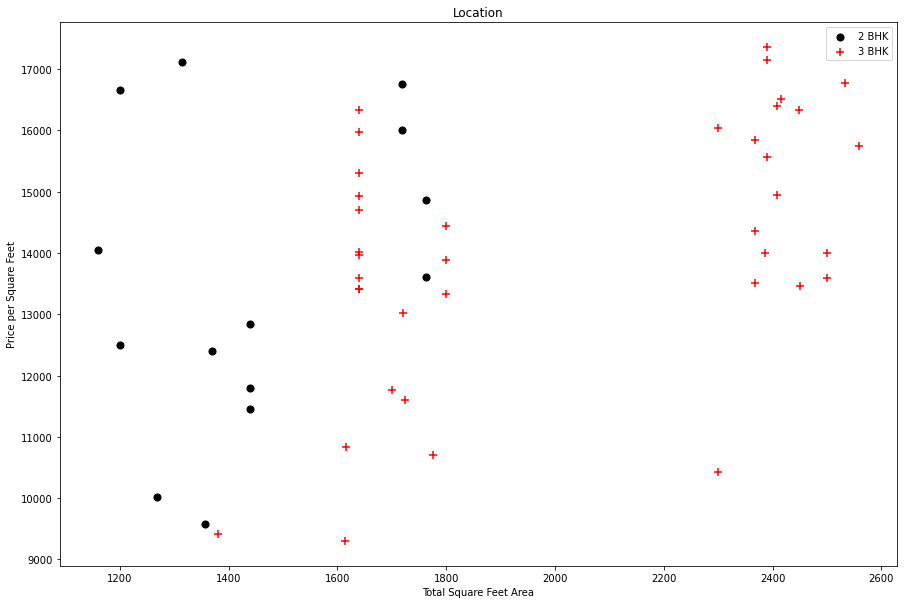

In [53]:
plot_scatter_chart(df7, 'Rajaji Nagar')

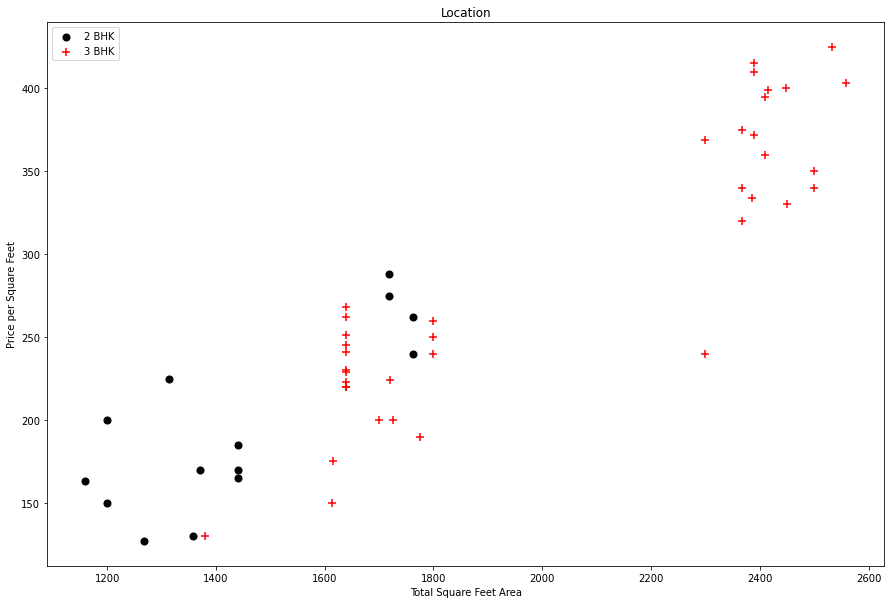

In [54]:
def plot_scatter_chart(df, location):
    
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.figure(figsize = (15,10))
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='black', label= '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+',color='red', label= '3 BHK',s=50)
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title('Location')
    plt.legend()
plot_scatter_chart(df7, 'Rajaji Nagar')

In [55]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [56]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 8)

Text(0, 0.5, 'Count')

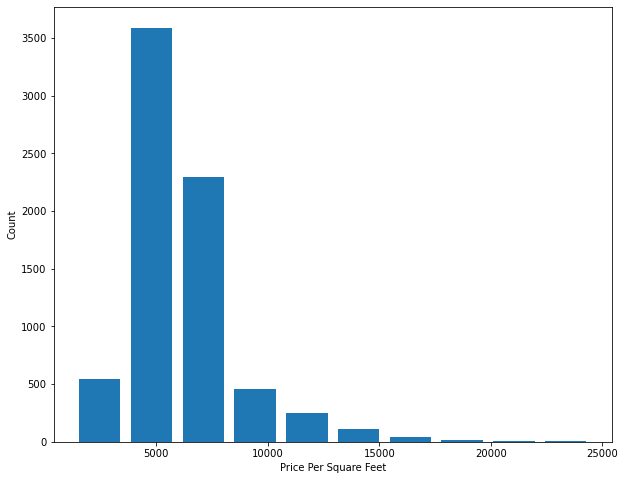

In [57]:
plt.figure(figsize = (10,8))
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [58]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

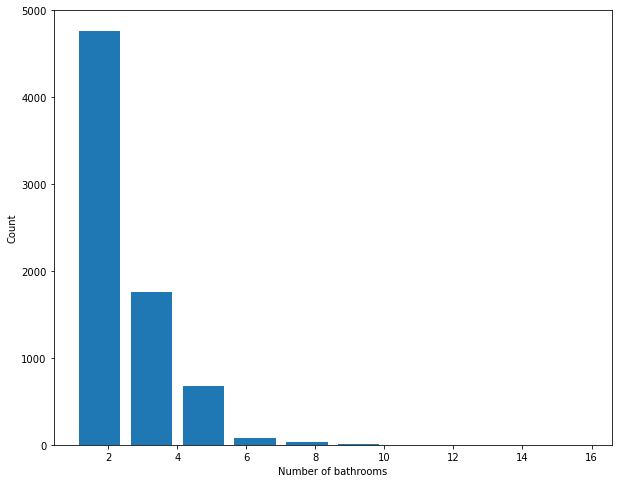

In [59]:
plt.figure(figsize = (10,8))
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [60]:
df8[df8.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [61]:
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [63]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [64]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,area_type,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X = df12.drop(['price', 'area_type'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X.shape

(7251, 244)

In [69]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [70]:
len(y)

7251

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874387

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [74]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.740299,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [75]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [76]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677209898

In [79]:
import pickle
with open('bangluru_house_pricing_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [80]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))